# Prediction Model of the Energy Consumption in France

## Libraries

In [11]:
# pip install xgboost

     |████████████████████████████████| 1.8 MB 2.8 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [7]:
# Importing libraries :
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

import xgboost as xgb
from sklearn.metrics import mean_squared_error
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

## Importing the data and fixing some data types

In [26]:
# Importing dataset :

df = pd.read_csv('/Users/adel/Desktop/Final-Project---IronHack-Paris/MySQL/MySQL Extract (Insights)/merged_dataset_final.csv')
df.head()

,Datetime,date,Year,Month,Day,Hour,Weekday,Consumption (MW),Fuel oil (MW),Coal (MW),...,CO2 emissions intensity (g/kWh),Trading with England (MW),Trading with Spain (MW),Trading with Italy (MW),Trading with Switzerland (MW),Trading with Germany-Belgium (MW),Flag Holiday,Average temperature (°C),Reference temperature (°C),Temperature Deviation (°C)
0,2012-01-01 00:00:00,2012-01-01,2012,1,1,0,6,58315,492,25,...,33,-1750,-1200,-862,-2625,-2940,1,11.7,4.6,7.1
1,2012-01-01 00:30:00,2012-01-01,2012,1,1,0,6,58315,492,25,...,33,-1750,-1200,-862,-2625,-2940,1,11.7,4.6,7.1
2,2012-01-01 01:00:00,2012-01-01,2012,1,1,1,6,56231,492,25,...,34,-1750,-1400,-862,-2625,-2714,1,11.7,4.6,7.1
3,2012-01-01 01:30:00,2012-01-01,2012,1,1,1,6,56075,491,25,...,35,-1750,-1400,-862,-2625,-2714,1,11.7,4.6,7.1
4,2012-01-01 02:00:00,2012-01-01,2012,1,1,2,6,55532,492,25,...,35,-1750,-1400,-862,-2327,-1088,1,11.7,4.6,7.1


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182592 entries, 0 to 182591
Data columns (total 28 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Datetime                           182592 non-null  object 
 1   date                               182592 non-null  object 
 2   Year                               182592 non-null  int64  
 3   Month                              182592 non-null  int64  
 4   Day                                182592 non-null  int64  
 5   Hour                               182592 non-null  int64  
 6   Weekday                            182592 non-null  int64  
 7   Consumption (MW)                   182592 non-null  int64  
 8   Fuel oil (MW)                      182592 non-null  int64  
 9   Coal (MW)                          182592 non-null  int64  
 10  Gas (MW)                           182592 non-null  int64  
 11  Nuclear (MW)                       1825

In [28]:
# Converting datetime column to datetime and date column to date :

df['Datetime'] = pd.to_datetime(df['Datetime'])
df['date'] = pd.to_datetime(df['date'])

In [29]:
df.shape

(182592, 28)

In [30]:
# Checking the time range of the dataset :

print('The dataset starts from {} and ends at {}'.format(df['Datetime'].min(), df['Datetime'].max()))

The dataset starts from 2012-01-01 00:00:00 and ends at 2022-05-31 23:30:00


In [31]:
# Putting datetime as index :

df = df.set_index('Datetime')
df.head()

,date,Year,Month,Day,Hour,Weekday,Consumption (MW),Fuel oil (MW),Coal (MW),Gas (MW),...,CO2 emissions intensity (g/kWh),Trading with England (MW),Trading with Spain (MW),Trading with Italy (MW),Trading with Switzerland (MW),Trading with Germany-Belgium (MW),Flag Holiday,Average temperature (°C),Reference temperature (°C),Temperature Deviation (°C)
Datetime,,,,,,,,,,,,,,,,,,,,,
2012-01-01 00:00:00,2012-01-01,2012,1,1,0,6,58315,492,25,3816,...,33,-1750,-1200,-862,-2625,-2940,1,11.7,4.6,7.1
2012-01-01 00:30:00,2012-01-01,2012,1,1,0,6,58315,492,25,3816,...,33,-1750,-1200,-862,-2625,-2940,1,11.7,4.6,7.1
2012-01-01 01:00:00,2012-01-01,2012,1,1,1,6,56231,492,25,3834,...,34,-1750,-1400,-862,-2625,-2714,1,11.7,4.6,7.1
2012-01-01 01:30:00,2012-01-01,2012,1,1,1,6,56075,491,25,3832,...,35,-1750,-1400,-862,-2625,-2714,1,11.7,4.6,7.1
2012-01-01 02:00:00,2012-01-01,2012,1,1,2,6,55532,492,25,3839,...,35,-1750,-1400,-862,-2327,-1088,1,11.7,4.6,7.1


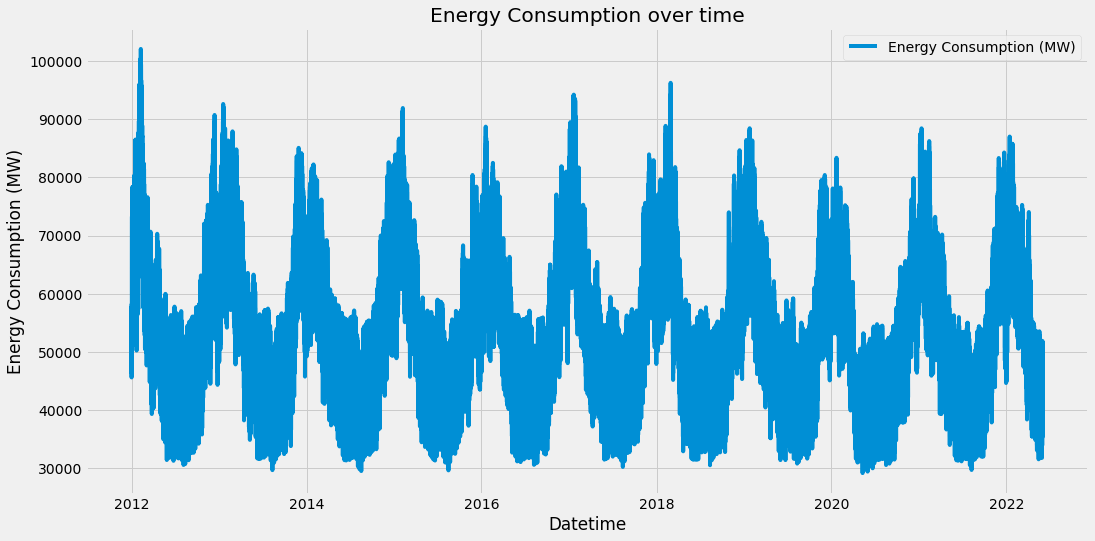

In [32]:
# Plotting the energy consumption over datetime :

plt.figure(figsize=(16,8))
plt.plot(df['Consumption (MW)'], label='Energy Consumption (MW)')
plt.title('Energy Consumption over time')
plt.xlabel('Datetime')
plt.ylabel('Energy Consumption (MW)')
plt.legend(loc='best')
plt.show()

We can see that there is an seasonal pattern.

## Train & Test Split

In [33]:
# The dataset starts from 2012-01-01 00:00:00 and ends at 2022-05-31 23:30:00. 
# So we are going to take the data from 2012-01-01 to 2020-01-01 for training set and from 2020-01-01 to 2022-05-31 for test set.
# Train and test split :
train = df.loc[df.index < '2020-01-01']
test = df.loc[df.index >= '2020-01-01']

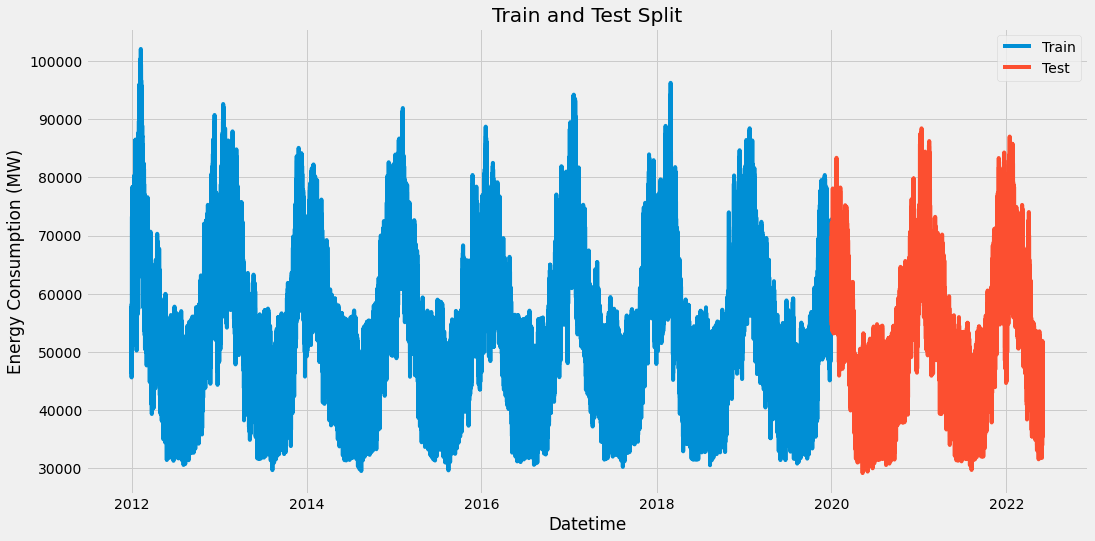

In [34]:
# Plotting the train and test split :
plt.figure(figsize=(16,8))
plt.plot(train['Consumption (MW)'], label='Train')
plt.plot(test['Consumption (MW)'], label='Test')
plt.title('Train and Test Split')
plt.xlabel('Datetime')
plt.ylabel('Energy Consumption (MW)')
plt.legend(loc='best')
plt.show()

## Feature Creation

In [42]:
# Creating new features from datetime in order to use them in the model :
df['quarter'] = df.index.quarter
df['dayofyear'] = df.index.dayofyear
df['weekofyear'] = df.index.weekofyear

def create_features(df):
    """
    Create time series features based on time series index.
    """
    df = df.copy()
    df['quarter'] = df.index.quarter
    df['dayofyear'] = df.index.dayofyear
    df['weekofyear'] = df.index.weekofyear
    return df

df = create_features(df)

## Vizualize the New Features and the Target Variable

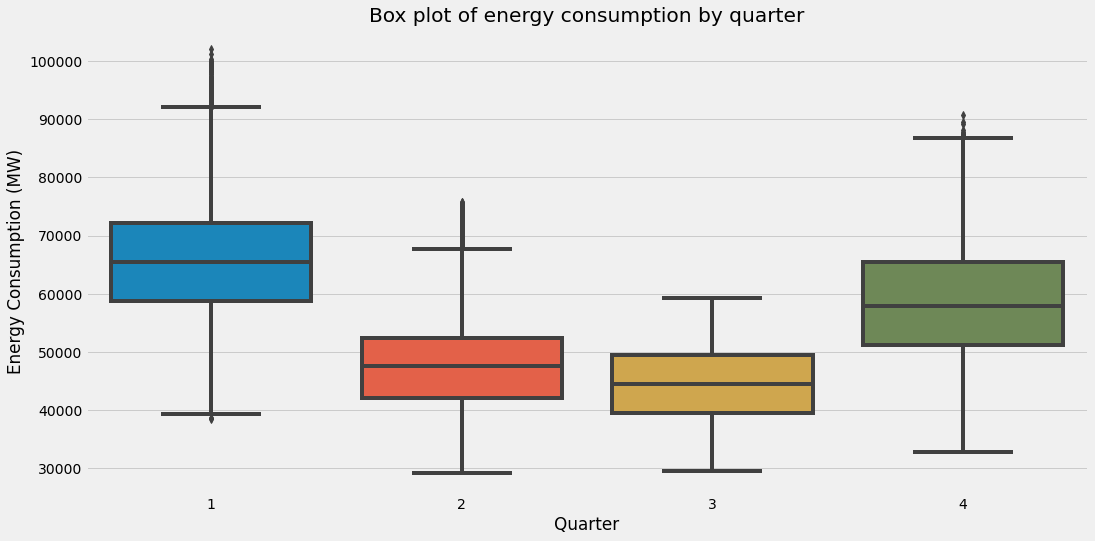

In [43]:
# Box plot of energy consumption by quarter :
plt.figure(figsize=(16,8))
sns.boxplot(x='quarter', y='Consumption (MW)', data=df)
plt.title('Box plot of energy consumption by quarter')
plt.xlabel('Quarter')
plt.ylabel('Energy Consumption (MW)')
plt.show()

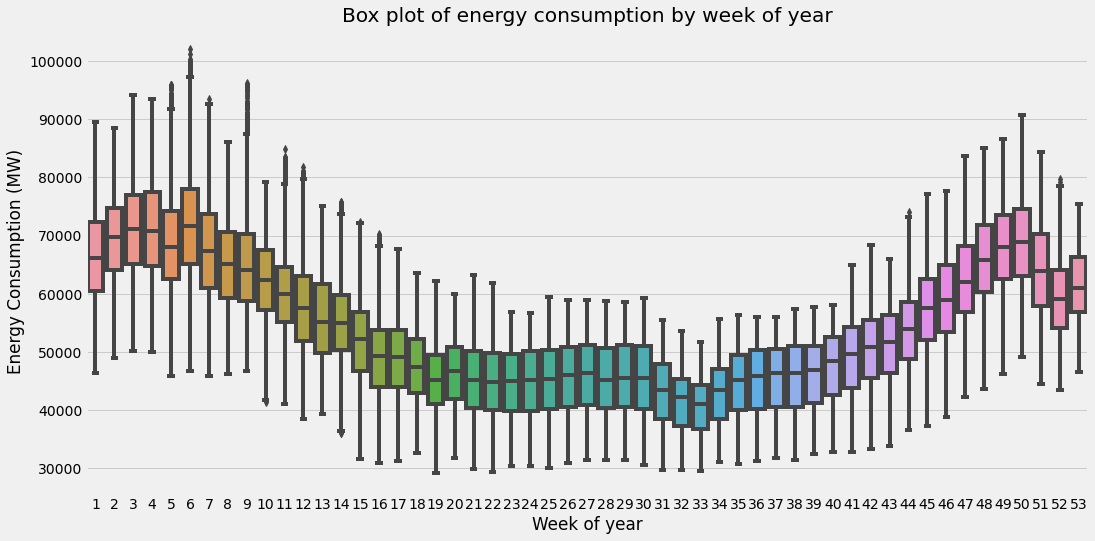

In [44]:
# Box plot of energy consumption by week of year :
plt.figure(figsize=(16,8))
sns.boxplot(x='weekofyear', y='Consumption (MW)', data=df)
plt.title('Box plot of energy consumption by week of year')
plt.xlabel('Week of year')
plt.ylabel('Energy Consumption (MW)')
plt.show()

## Build the model

In [61]:
df.columns

Index(['date', 'Year', 'Month', 'Day', 'Hour', 'Weekday', 'Consumption (MW)',
       'Fuel oil (MW)', 'Coal (MW)', 'Gas (MW)', 'Nuclear (MW)', 'Wind (MW)',
       'Solar (MW)', 'Hydroelectric (MW)', 'Pumped storage (MW)',
       'Bioenergy (MW)', 'Physical exchanges (MW)',
       'CO2 emissions intensity (g/kWh)', 'Trading with England (MW)',
       'Trading with Spain (MW)', 'Trading with Italy (MW)',
       'Trading with Switzerland (MW)', 'Trading with Germany-Belgium (MW)',
       'Flag Holiday', 'Average temperature (°C)',
       'Reference temperature (°C)', 'Temperature Deviation (°C)', 'quarter',
       'dayofyear', 'weekofyear'],
      dtype='object')

In [66]:
train = create_features(train)
test = create_features(test)

FEATURES = ['Year', 'Month', 'Day', 'Hour', 'Weekday','Flag Holiday', 'Average temperature (°C)',
'Reference temperature (°C)', 'Temperature Deviation (°C)', 'quarter', 'dayofyear', 'weekofyear']

#FEATURES = ['Year', 'Month', 'Day', 'Hour', 'Weekday', 'quarter','dayofyear', 'weekofyear']
TARGET = 'Consumption (MW)'

X_train = train[FEATURES]
y_train = train[TARGET]

X_test = test[FEATURES]
y_test = test[TARGET]

In [69]:
reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',    
                       n_estimators=1000,
                       early_stopping_rounds=50,
                       objective='reg:linear',
                       max_depth=3,
                       learning_rate=0.01)
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        verbose=100)

[16:31:19] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:55244.86271	validation_1-rmse:53638.27634
[100]	validation_0-rmse:20754.72630	validation_1-rmse:19030.37935
[200]	validation_0-rmse:8538.04277	validation_1-rmse:7046.92921
[300]	validation_0-rmse:4633.03528	validation_1-rmse:4046.98279
[400]	validation_0-rmse:3517.52028	validation_1-rmse:3808.13101
[464]	validation_0-rmse:3212.47108	validation_1-rmse:3819.20271


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             objective='reg:linear', predictor=None, ...)

## Feature Importance

In [70]:
# Creating a dataframe with the feature importance :
fi = pd.DataFrame(data=reg.feature_importances_,
             index=reg.feature_names_in_,
             columns=['importance'])

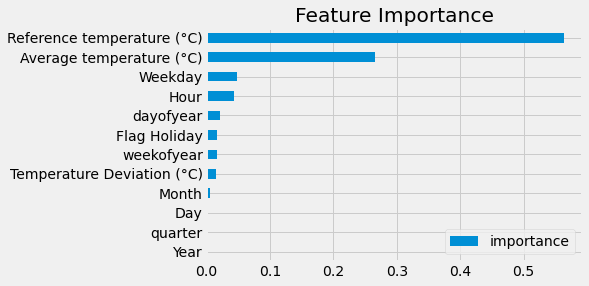

In [71]:
# Plotting the feature importance :
fi.sort_values('importance').plot(kind='barh', title='Feature Importance')
plt.legend(loc='lower right')
plt.show()

#The unit of the x axis is the number of times a feature is used to split the data across all trees.

## Forecast on Test 

In [73]:
# Creating a column with the prediction on X_test : (X_test is the test set and Y_test is the target of the test set)
test['prediction'] = reg.predict(X_test)

# Merging the prediction column with the original dataset
df = df.merge(test[['prediction']], how='left', left_index=True, right_index=True)

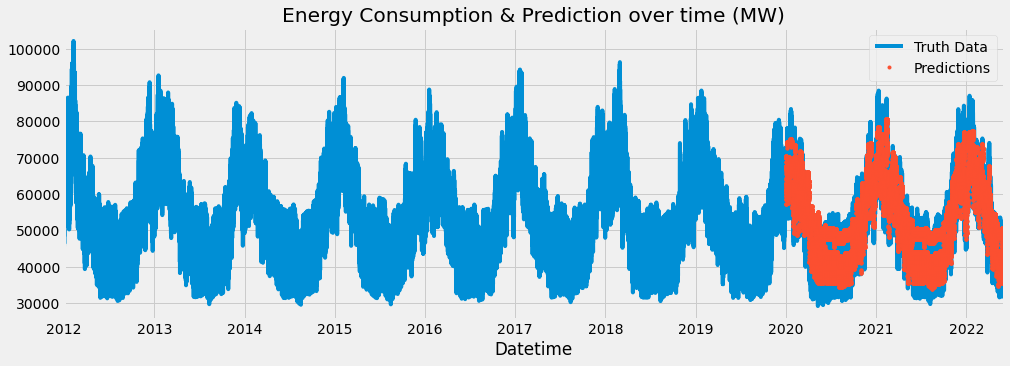

In [77]:
# Plotting the raw data and the prediction :
ax = df[['Consumption (MW)']].plot(figsize=(15, 5))
df['prediction_y'].plot(ax=ax, style='.')
plt.legend(['Truth Data', 'Predictions'])
ax.set_title('Energy Consumption & Prediction over time (MW)')
plt.show()

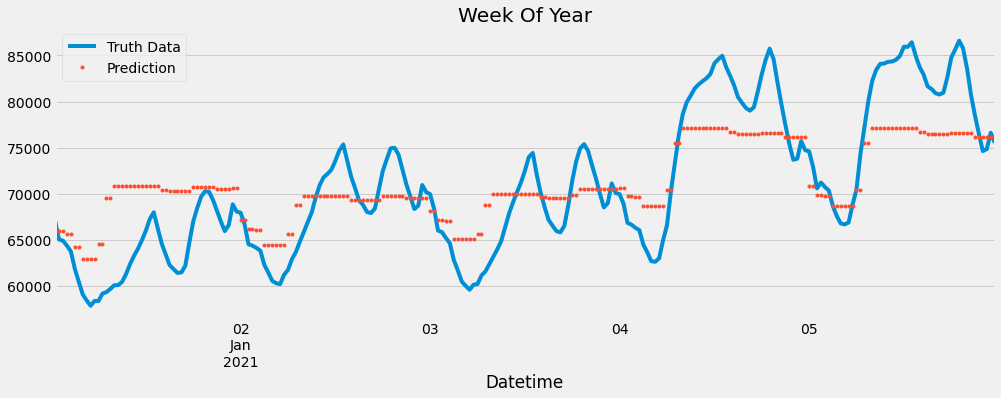

In [95]:
# Plottting the energy consumption by Week of Year in order to see the seasonality (in 2016) :

ax = df.loc[(df.index > '01-01-2021') & (df.index < '01-06-2021')]\
.plot(figsize=(15, 5), title='Week Of Year', y='Consumption (MW)')
df.loc[(df.index > '01-01-2021') & (df.index < '01-06-2021')]['prediction_y'].plot(style='.')

plt.legend(['Truth Data','Prediction'])
plt.show()

## Score (RMSE)

## Calculate Error

In [92]:
# Looking at the worst predicted days :

test['error'] = np.abs(test[TARGET] - test['prediction'])
test['date'] = test.index.date

test.groupby(['date'])['error'].mean().sort_values(ascending=False).head(10)

date
2020-04-14    10965.951172
2020-03-25    10475.931641
2020-03-20    10277.708008
2020-03-23    10227.097656
2020-03-24    10201.364258
2020-03-26    10115.495117
2020-04-13     9920.451172
2020-03-21     9638.356445
2020-03-27     9425.364258
2020-04-10     9031.091797
Name: error, dtype: float32

The most difficult days to predict are in 2020, in the middle of the lockdown period. This makes sense because it is an exceptional event that is impossible to predict.

In [93]:
# Looking at the best predicted days :
test.groupby(['date'])['error'].mean().sort_values(ascending=True).head(10)

date
2022-05-19    1246.451538
2021-09-01    1296.237915
2021-07-29    1326.309692
2022-05-17    1330.773438
2021-06-10    1338.687378
2021-09-04    1350.167847
2022-05-18    1356.048462
2021-08-31    1367.847656
2021-09-02    1373.991699
2021-09-11    1376.893677
Name: error, dtype: float32

## ARIMA MODEL TEST

In [19]:
# Creating a copy of df in a new dataframe called data :
data = df.copy()

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from statsmodels.tsa.arima.model import ARIMA

In [21]:
# Split the data into training and testing sets
train_size = int(len(data) * 0.8)
train_data, test_data = data[:train_size], data[train_size:]

# Choose a time series model and train it on the training set
model = ARIMA(train_data['Consumption (MW)'], order=(1, 1, 1))
fitted_model = model.fit()

In [22]:

# Evaluate the performance of the model on the testing set
test_predictions = fitted_model.predict(start=len(train_data), end=len(data)-1, typ='levels')
test_rmse = np.sqrt(np.mean((test_predictions - test_data['Consumption (MW)']) ** 2))
print('Test RMSE:', test_rmse)

Test RMSE: 21965.495186695098


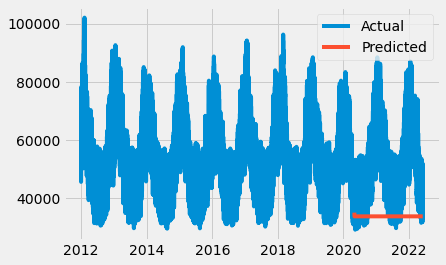

In [24]:
# Visualize the results
plt.plot(data['Consumption (MW)'], label='Actual')
plt.plot(test_data.index, test_predictions, label='Predicted')
plt.legend()
plt.show()